In [198]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
#importing the dataset
data = pd.read_csv('/content/Ferilizer.csv')
data.head()

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,28,52,38,Sandy,Sugarcane,11,13,23,Urea
1,33,52,64,Clayey,Pulses,38,16,7,20-20
2,36,51,60,Red,Millets,13,16,20,20-20
3,38,52,45,Loamy,Wheat,20,3,37,Urea
4,31,53,49,Red,Millets,44,16,39,Urea


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperature      1432 non-null   int64 
 1   Humidity         1432 non-null   int64 
 2   Moisture         1432 non-null   int64 
 3   Soil Type        1432 non-null   object
 4   Crop Type        1432 non-null   object
 5   Nitrogen         1432 non-null   int64 
 6   Potassium        1432 non-null   int64 
 7   Phosphorous      1432 non-null   int64 
 8   Fertilizer Name  1432 non-null   object
dtypes: int64(6), object(3)
memory usage: 100.8+ KB


In [202]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [203]:
#checking unique values
data.nunique()

Temperature    14
Humidity       22
Moisture       40
Soil_Type       5
Crop_Type      11
Nitrogen       40
Potassium      19
Phosphorous    41
Fertilizer      7
dtype: int64

In [204]:
#checking for null values
data.isna().sum()

Temperature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [205]:
#statistical parameters
data.describe(include='all')

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,1432.000000,1432.000000,1432.000000,1432,1432,1432.000000,1432.000000,1432.000000,1432
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Maize,NaN,NaN,NaN,28-28
freq,NaN,NaN,NaN,297,151,NaN,NaN,NaN,236
mean,31.423184,60.621508,44.811453,NaN,NaN,24.633380,8.807961,19.453911,NaN
std,4.064259,6.358543,11.511520,NaN,NaN,11.641348,5.390300,11.915055,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,5.000000,0.000000,0.000000,NaN
25%,28.000000,55.000000,35.000000,NaN,NaN,15.000000,4.000000,9.000000,NaN
50%,31.000000,61.000000,45.000000,NaN,NaN,25.000000,9.000000,19.000000,NaN
75%,35.000000,66.000000,55.000000,NaN,NaN,34.250000,14.000000,30.000000,NaN


In [206]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

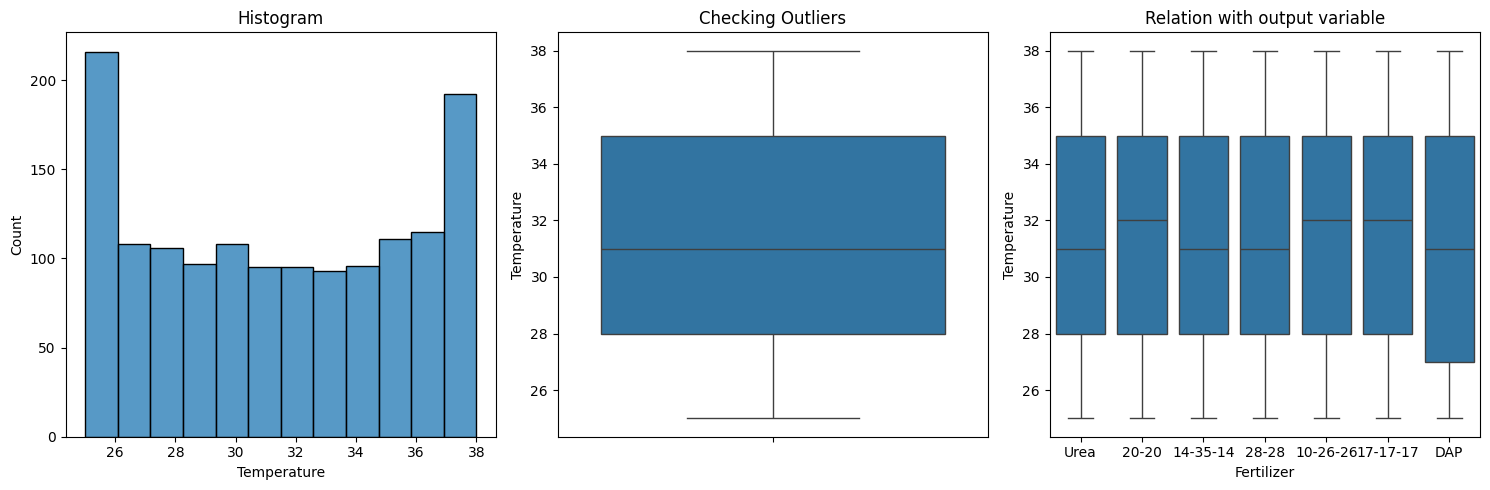

In [207]:
#EDA - Temparature variable
plot_conti(data.Temperature)

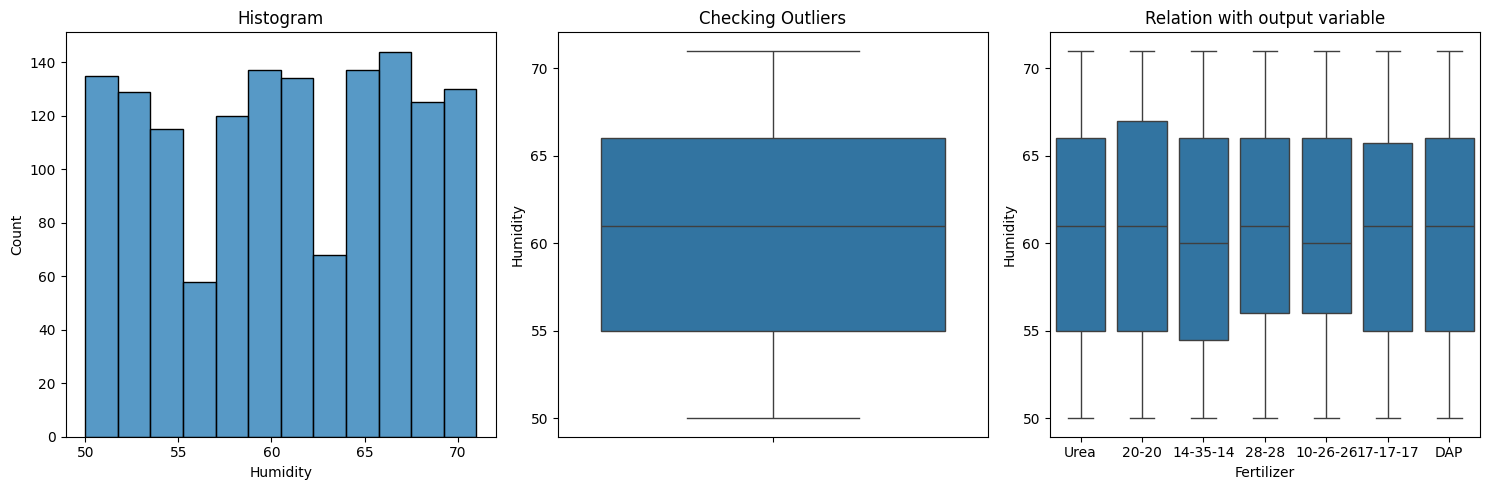

In [208]:
#EDA - Humidity variable
plot_conti(data.Humidity)

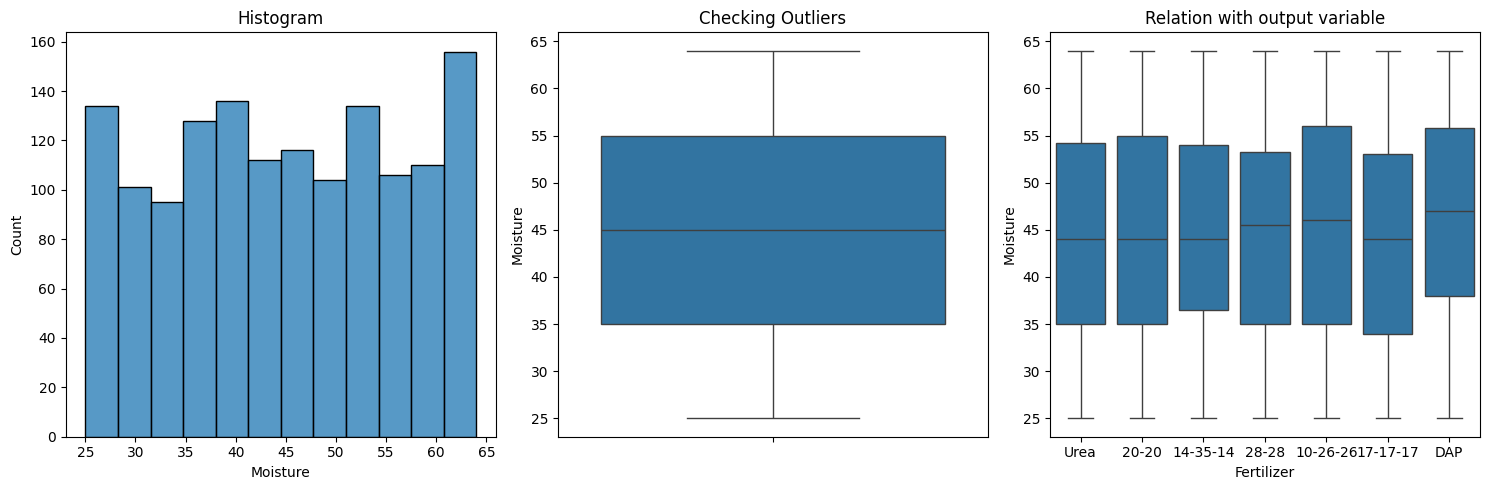

In [209]:
#EDA - Moisture variable
plot_conti(data.Moisture)

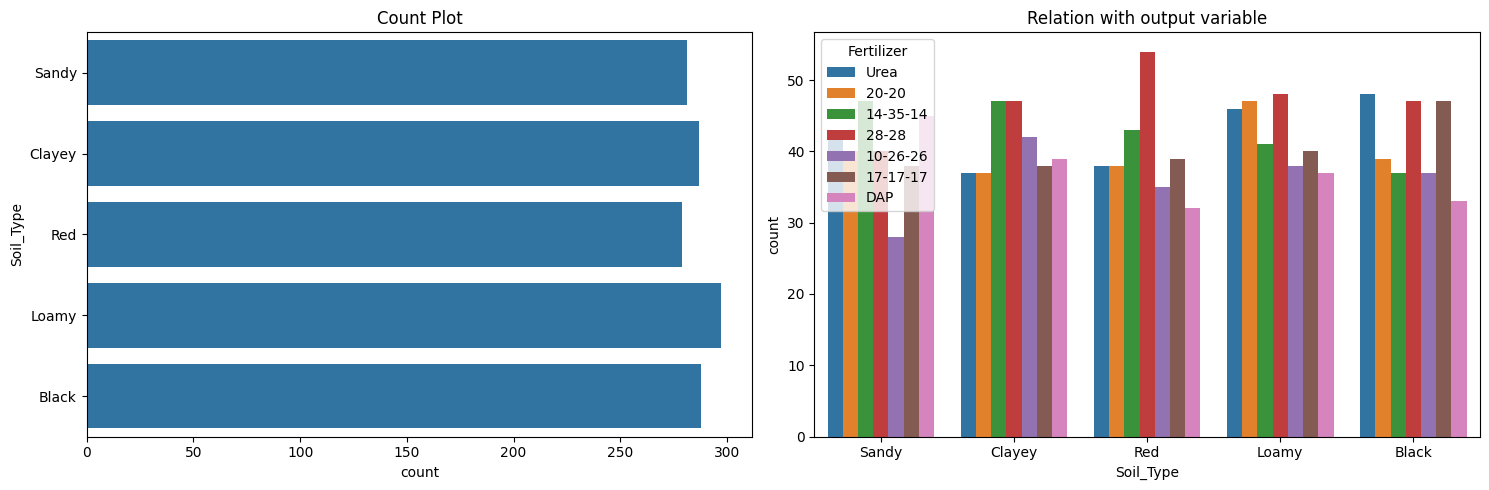

In [210]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

<Axes: xlabel='Soil_Type', ylabel='Temperature'>

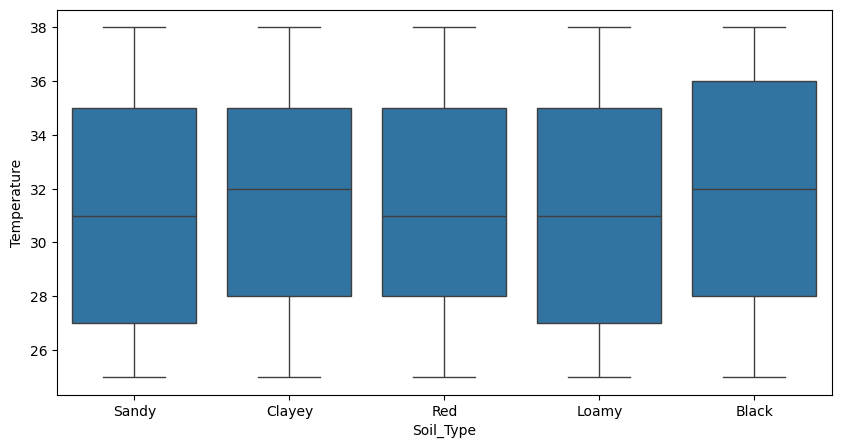

In [211]:
#relation of soil type with Temperature
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temperature)

<Axes: xlabel='Soil_Type', ylabel='Temperature'>

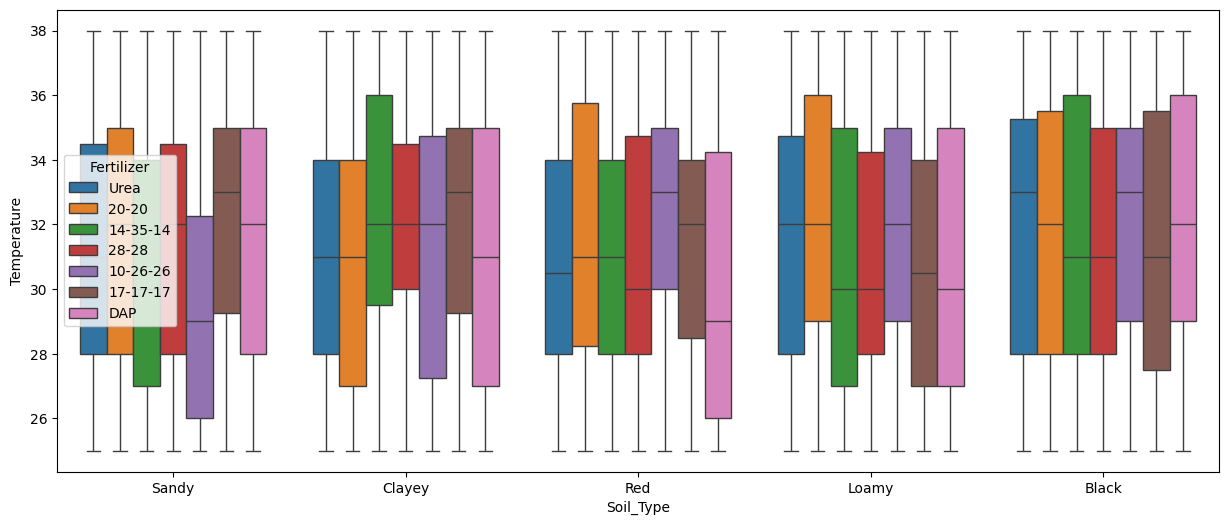

In [212]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temperature,hue=data.Fertilizer)

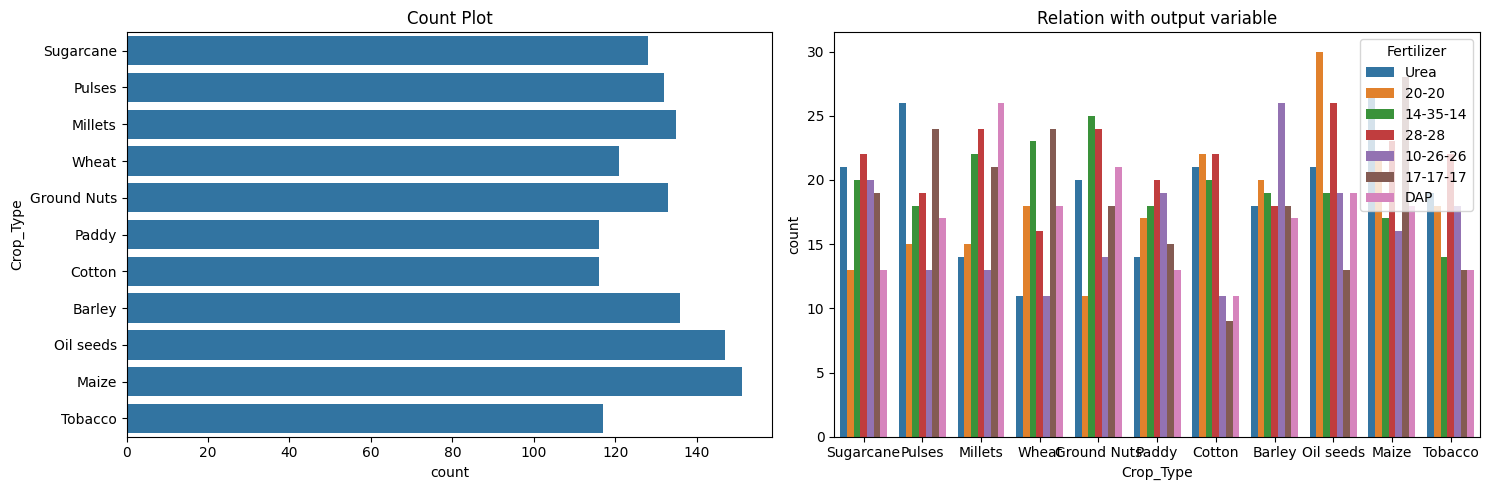

In [213]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

<Axes: xlabel='Crop_Type', ylabel='Temperature'>

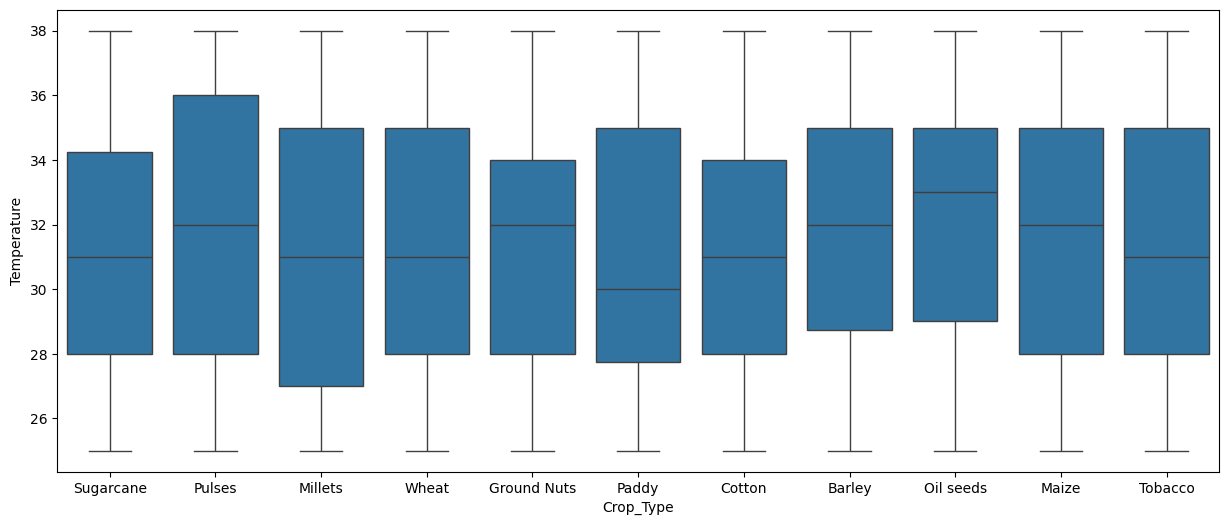

In [214]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temperature)

<Axes: xlabel='Crop_Type', ylabel='Humidity'>

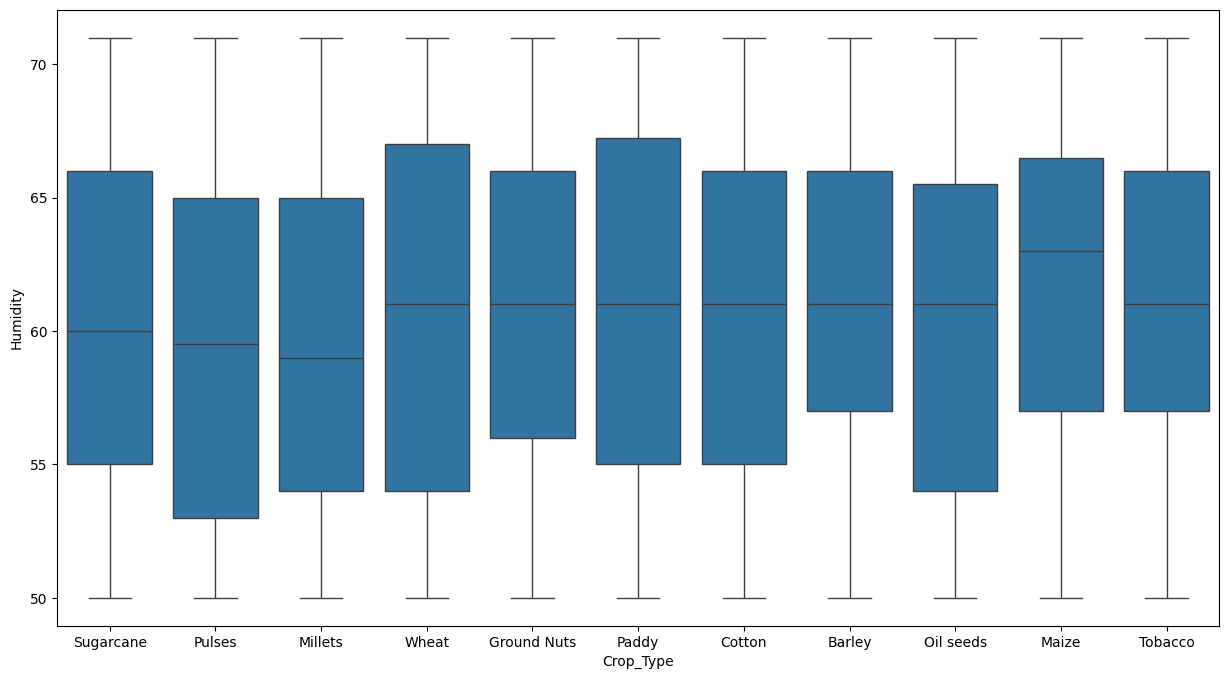

In [215]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

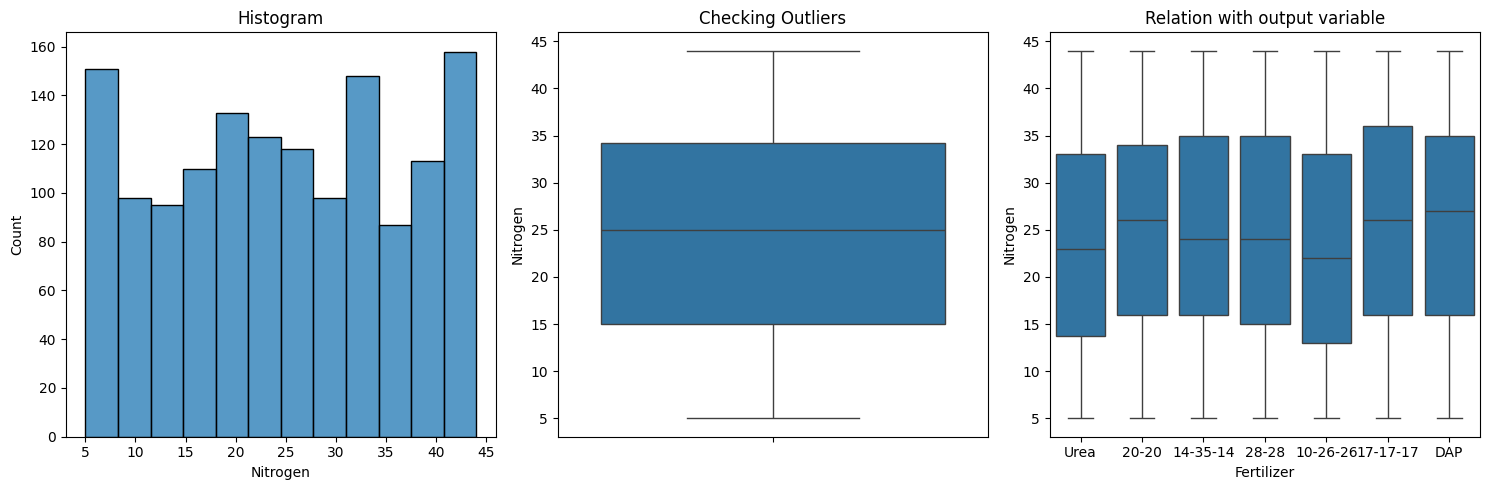

In [216]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

<Axes: xlabel='Crop_Type', ylabel='Nitrogen'>

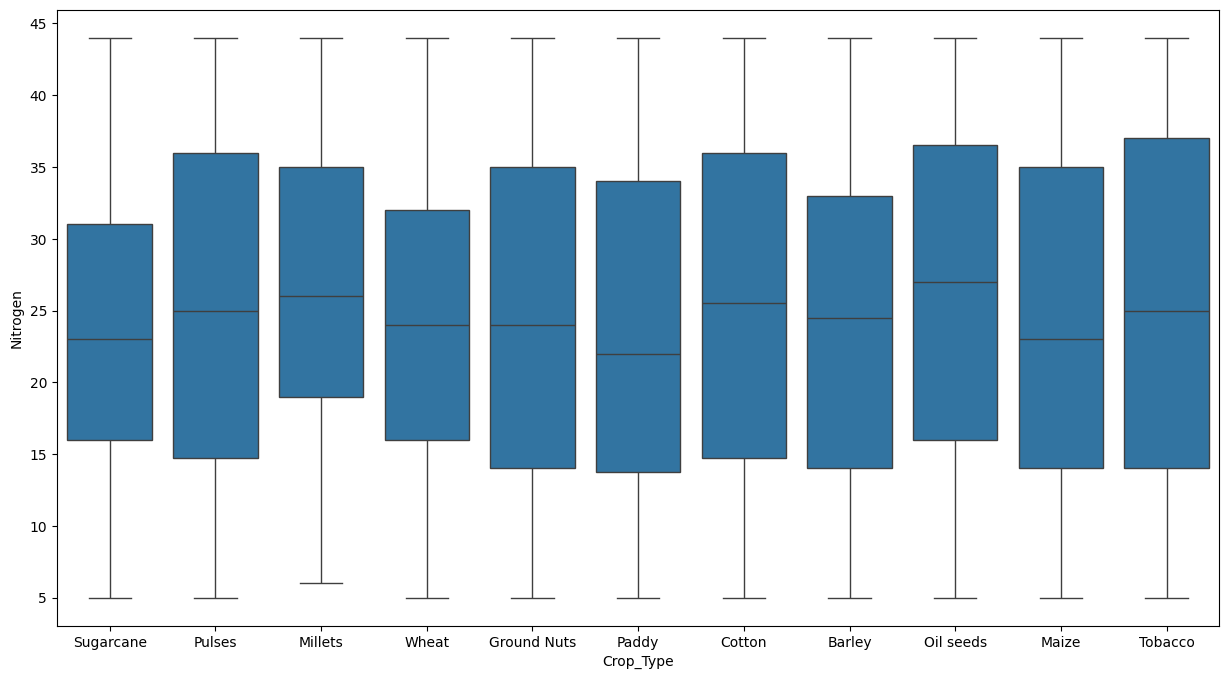

In [217]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

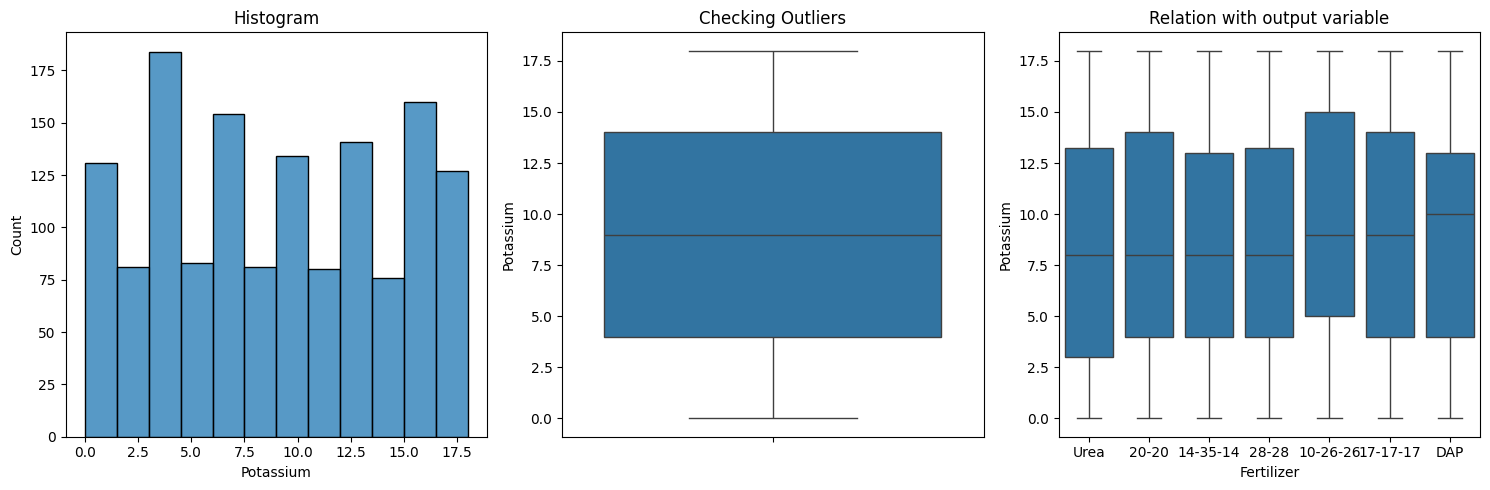

In [218]:
#EDA - Potassium variable
plot_conti(data.Potassium)

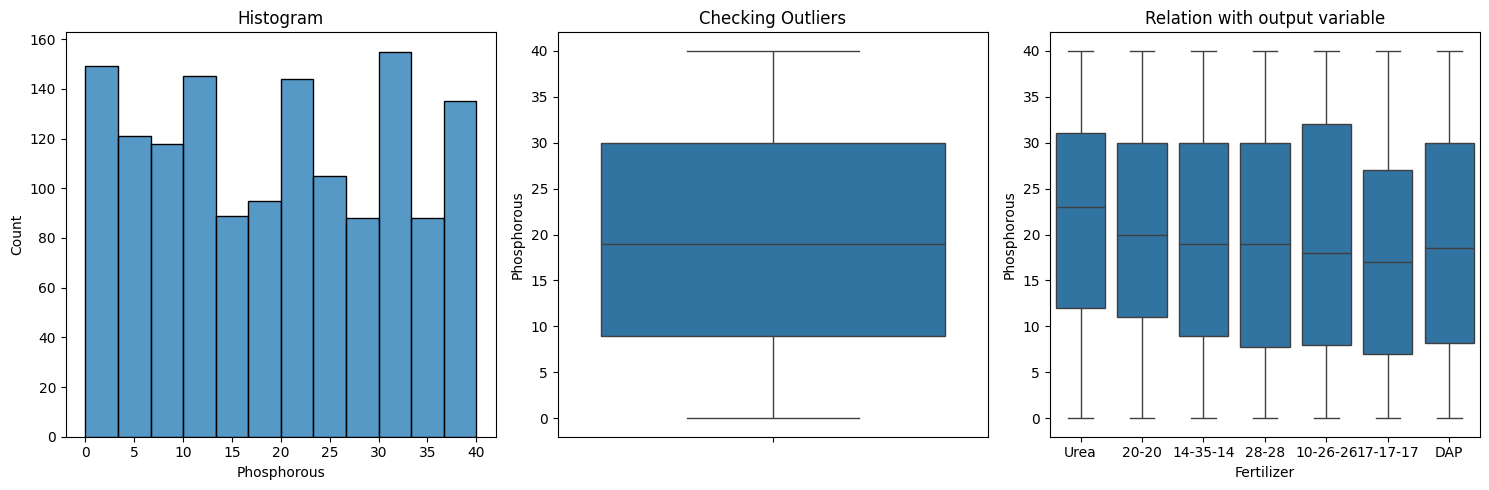

In [219]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

In [220]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [221]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [222]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [223]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [224]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (1145, 8), y_train = (1145,), x_test = (287, 8), y_test = (287,)


In [225]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 1392 to 1061
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  1145 non-null   int64
 1   Humidity     1145 non-null   int64
 2   Moisture     1145 non-null   int64
 3   Soil_Type    1145 non-null   int64
 4   Crop_Type    1145 non-null   int64
 5   Nitrogen     1145 non-null   int64
 6   Potassium    1145 non-null   int64
 7   Phosphorous  1145 non-null   int64
dtypes: int64(8)
memory usage: 80.5 KB


### Logistic regression model

In [226]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [227]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [228]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.10      0.05      0.07        39
           1       0.17      0.22      0.19        41
           2       0.12      0.09      0.11        43
           3       0.17      0.22      0.20        36
           4       0.16      0.20      0.18        50
           5       0.07      0.05      0.06        38
           6       0.19      0.20      0.20        40

    accuracy                           0.15       287
   macro avg       0.14      0.15      0.14       287
weighted avg       0.14      0.15      0.14       287



In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.15      0.05      0.08        39
           1       0.14      0.15      0.14        41
           2       0.15      0.12      0.13        43
           3       0.18      0.22      0.20        36
           4       0.22      0.30      0.26        50
           5       0.11      0.11      0.11        38
           6       0.18      0.23      0.20        40

    accuracy                           0.17       287
   macro avg       0.16      0.17      0.16       287
weighted avg       0.16      0.17      0.16       287

Best score :  0.172030524980189
Best params :  {'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 300}


In [231]:
#Final Model
params = {
    'n_estimators':[350,400,450],
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(data.drop('Fertilizer',axis=1),data.Fertilizer)

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best score :  0.15712452011496772
Best params :  {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 400}


In [232]:
x_train

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
1392,37,57,53,2,5,33,15,31
1224,31,51,50,1,10,22,18,16
1094,29,70,37,2,5,12,7,37
195,36,58,31,1,3,42,4,19
304,38,63,46,4,8,14,3,9
...,...,...,...,...,...,...,...,...
715,30,71,35,2,10,44,17,4
905,35,70,57,0,7,26,0,15
1096,26,61,52,3,7,7,6,11
235,35,67,38,1,2,30,8,3


In [233]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [234]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[34,67,62,0,1,7,0,30]])

array([6])

In [235]:
y_train

1392    5
1224    2
1094    6
195     3
304     6
       ..
715     4
905     6
1096    6
235     1
1061    4
Name: Fertilizer, Length: 1145, dtype: int64

In [236]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [237]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[6]

'Urea'

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

Null values in dataset:
 Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64


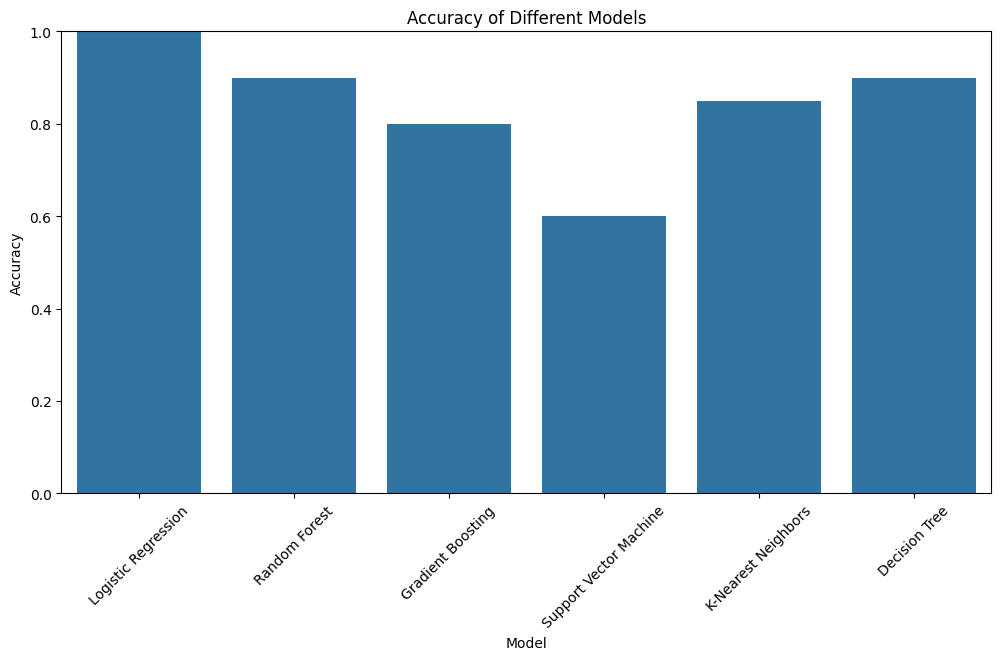

Best Model: Logistic Regression
Best model saved as: best_model.pkl


In [239]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/DATASET/Fertilizer Prediction.csv')

# Changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'}, inplace=True)

# Checking for missing values
print("Null values in dataset:\n", data.isnull().sum())

# Dropping rows with missing values
data.dropna(inplace=True)

# Encoding the labels for categorical variables
encode_ferti = LabelEncoder()
data['Fertilizer'] = encode_ferti.fit_transform(data['Fertilizer'])

# Encoding other categorical variables if necessary
# Assuming Soil Type and Crop Type are categorical
encode_soil = LabelEncoder()
data['Soil_Type'] = encode_soil.fit_transform(data['Soil_Type'])

encode_crop = LabelEncoder()
data['Crop_Type'] = encode_crop.fit_transform(data['Crop_Type'])

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer', axis=1), data['Fertilizer'], test_size=0.2, random_state=1)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
accuracy_scores = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((name, accuracy))

# Store accuracy scores in a dataframe
accuracy_df = pd.DataFrame(accuracy_scores, columns=['Model', 'Accuracy'])

# Plot accuracy scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Determine the best model
best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Model']
print("Best Model:", best_model)

# Save the best model for later use in Flask
best_model_file = 'best_model.pkl'
pickle.dump(models[best_model], open(best_model_file, 'wb'))
print("Best model saved as:", best_model_file)


In [240]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
accuracy_scores = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((name, accuracy))

# Store accuracy scores in a dataframe
accuracy_df = pd.DataFrame(accuracy_scores, columns=['Model', 'Accuracy'])

# Display accuracy scores in table format
print(accuracy_df)


                    Model  Accuracy
0     Logistic Regression      1.00
1           Random Forest      0.95
2       Gradient Boosting      0.80
3  Support Vector Machine      0.60
4     K-Nearest Neighbors      0.85
5           Decision Tree      0.80


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training Logistic Regression
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
--------------------------------------------
Training Random Forest
Ac

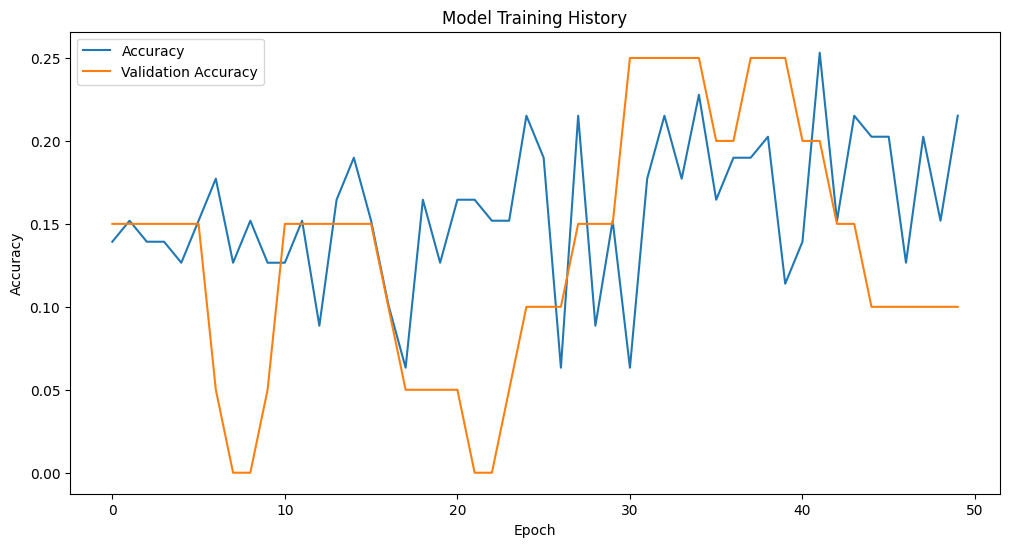

Neural network model saved as 'neural_network_model.h5'


In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle

# Ignore warnings
warnings.filterwarnings('ignore')

# Mount Google Drive if using Colab
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MAJOR PROJECT/DATASET/Fertilizer Prediction.csv')

# Data preprocessing
data.rename(columns={'Humidity ':'Humidity', 'Soil Type':'Soil_Type', 'Crop Type':'Crop_Type', 'Fertilizer Name':'Fertilizer'}, inplace=True)
data.dropna(inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in ['Soil_Type', 'Crop_Type', 'Fertilizer']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Train-test split
X = data.drop('Fertilizer', axis=1)
y = data['Fertilizer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Evaluate models
for name, model in models.items():
    print("Training", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("--------------------------------------------")

# Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.75),
    Dense(32, activation='relu'),
    Dropout(0.75),
    Dense(16, activation='relu'),
    Dense(len(label_encoders['Fertilizer'].classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the best model
model.save('neural_network_model.h5')
print("Neural network model saved as 'neural_network_model.h5'")


In [317]:
# Confusion matrices for each model
cml = confusion_matrix(y_test, models["Logistic Regression"].predict(X_test))
cmrf = confusion_matrix(y_test, models["Random Forest"].predict(X_test))
cmdt = confusion_matrix(y_test, models["Decision Tree"].predict(X_test))
cmgb = confusion_matrix(y_test, models["Gradient Boosting"].predict(X_test))
cmknn = confusion_matrix(y_test, models["K-Nearest Neighbors"].predict(X_test))
cmsvc = confusion_matrix(y_test, models["Support Vector Machine"].predict(X_test))

# Displaying the confusion matrices
print("Confusion Matrix for Logistic Regression:")
print(cml)
print("--------------------------------------------")
print("Confusion Matrix for Random Forest:")
print(cmrf)
print("--------------------------------------------")
print("Confusion Matrix for Decision Tree:")
print(cmdt)
print("--------------------------------------------")
print("Confusion Matrix for Gradient Boosting:")
print(cmgb)
print("--------------------------------------------")
print("Confusion Matrix for K-Nearest Neighbors:")
print(cmknn)
print("--------------------------------------------")
print("Confusion Matrix for Support Vector Machine:")
print(cmsvc)


Confusion Matrix for Logistic Regression:
[[3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
--------------------------------------------
Confusion Matrix for Random Forest:
[[2 1 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
--------------------------------------------
Confusion Matrix for Decision Tree:
[[1 2 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
--------------------------------------------
Confusion Matrix for Gradient Boosting:
[[1 2 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 0 0 0 0 2]
 [0 0 0 2 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
--------------------------------------------
Confusion Matrix for K-Nearest Neighbors:
[[1 0 2 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
------------------------

In [318]:
import numpy as np
import pandas as pd

# Define the confusion matrices
confusion_matrices = {
    'Logistic Regression': cml,
    'Decision Tree': cmdt,
    'Random Forest': cmrf,
    'K Nearest Neighbors': cmknn,
    'Support Vector Machine': cmsvc,
    'Gradient Boosting':cmgb

}

# Initialize dictionary to store results
results = {}

# Calculate accuracy, sensitivity, and specificity for each classifier
for name, cm in confusion_matrices.items():
    # Extracting values from the confusion matrix
    TP = np.diag(cm)
    FP = np.sum(cm, axis=1) - TP
    FN = np.sum(cm, axis=0) - TP
    TN = np.sum(cm) - (TP + FP + FN)

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Calculate sensitivity (true positive rate)
    sensitivity = TP / (TP + FN)

    # Calculate specificity (true negative rate)
    specificity = TN / (TN + FP)

    # Store results in dictionary
    results[name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
print("Results:")
print(results_df)


Results:
                                                     Accuracy  \
Logistic Regression       [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]   
Decision Tree             [0.8, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0]   
Random Forest           [0.95, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0]   
K Nearest Neighbors     [0.9, 1.0, 0.9, 0.95, 0.95, 1.0, 1.0]   
Support Vector Machine  [0.85, 0.7, 0.9, 0.9, 1.0, 0.85, 1.0]   
Gradient Boosting         [0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 0.9]   

                                                              Sensitivity  \
Logistic Regression                   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]   
Decision Tree           [0.3333333333333333, 0.6, nan, 1.0, 1.0, 1.0, ...   
Random Forest                        [1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0]   
K Nearest Neighbors     [1.0, 1.0, 0.5, 0.6666666666666666, 1.0, 1.0, ...   
Support Vector Machine                [nan, 0.0, nan, 0.5, 1.0, 0.4, 1.0]   
Gradient Boosting                    [1.0, 0.6, nan, 1.0, 1.0, 1.0, 0.75]

In [319]:
import numpy as np
import pandas as pd

# Define the confusion matrices
confusion_matrices = {
    'Logistic Regression': cml,
    'Decision Tree': cmdt,
    'Random Forest': cmrf,
    'K Nearest Neighbors': cmknn,
    'Support Vector Machine': cmsvc,
    'Gradient Boosting': cmgb
}

# Initialize dictionary to store results
results = {}

# Calculate accuracy, sensitivity, and specificity for each classifier
for name, cm in confusion_matrices.items():
    # Extracting values from the confusion matrix
    TP = np.diag(cm)
    FP = np.sum(cm, axis=1) - TP
    FN = np.sum(cm, axis=0) - TP
    TN = np.sum(cm) - (TP + FP + FN)

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    # Handle NaN values
    accuracy = np.nanmean(accuracy)

    # Calculate sensitivity (true positive rate)
    sensitivity = TP / (TP + FN)
    # Handle NaN values
    sensitivity = np.nanmean(sensitivity)

    # Calculate specificity (true negative rate)
    specificity = TN / (TN + FP)
    # Handle NaN values
    specificity = np.nanmean(specificity)

    # Store results in dictionary
    results[name] = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
print("Results:")
print(results_df)


Results:
                        Accuracy  Sensitivity  Specificity
Logistic Regression     1.000000     1.000000     1.000000
Decision Tree           0.942857     0.822222     0.968908
Random Forest           0.985714     0.964286     0.992063
K Nearest Neighbors     0.957143     0.880952     0.977444
Support Vector Machine  0.885714     0.580000     0.939076
Gradient Boosting       0.942857     0.891667     0.970677


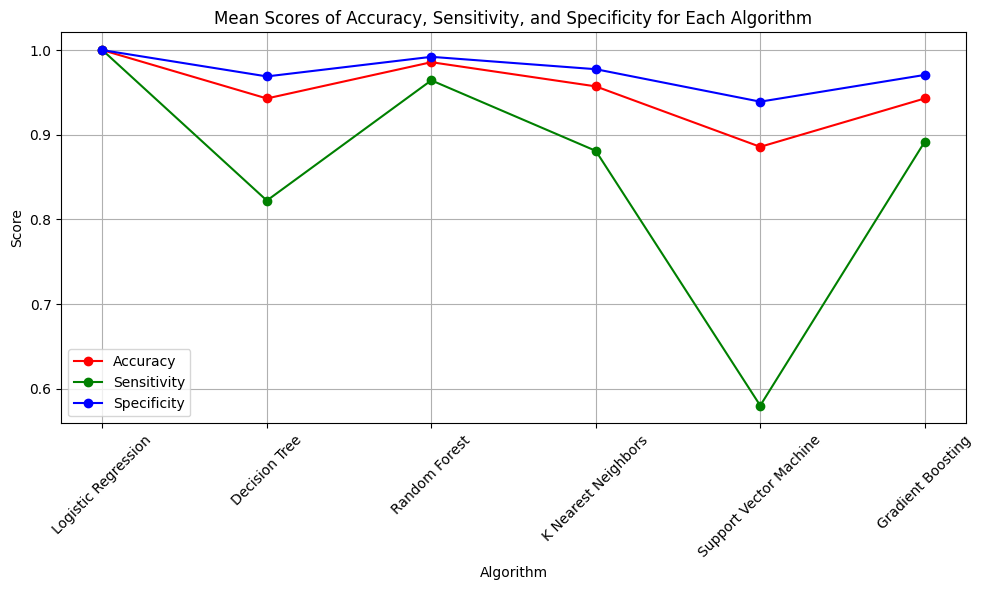

In [321]:
import matplotlib.pyplot as plt

# Plotting mean accuracy, sensitivity, and specificity for each algorithm
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(results_df.index, results_df['Accuracy'], marker='o', label='Accuracy',color='red')

# Plot mean sensitivity
plt.plot(results_df.index, results_df['Sensitivity'], marker='o', label='Sensitivity',color='green')

# Plot mean specificity
plt.plot(results_df.index, results_df['Specificity'], marker='o', label='Specificity',color='blue')

# Adding labels and title
plt.title('Mean Scores of Accuracy, Sensitivity, and Specificity for Each Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
